In [1]:
# only for cuda enabled laptop and desktop
import tensorflow as tf
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print(physical_devices)
if physical_devices:
  tf.config.experimental.set_memory_growth(physical_devices[0], True)

[]


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL #pillow to handle images
import tensorflow as tf

In [4]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.org/example_images/flower_photos.tgz" #tgz = tar ball (just like zip file)
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)

In [5]:
data_dir

'C:\\Users\\Lenovo\\.keras\\datasets\\flower_photos'

In [6]:
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('C:/Users/Lenovo/.keras/datasets/flower_photos')

In [7]:
os.listdir('C:/Users/Lenovo/.keras/datasets/flower_photos')

['daisy', 'dandelion', 'LICENSE.txt', 'roses', 'sunflowers', 'tulips']

In [8]:
os.listdir('C:/Users/Lenovo/.keras/datasets/flower_photos/daisy/')

['100080576_f52e8ee070_n.jpg',
 '10140303196_b88d3d6cec.jpg',
 '10172379554_b296050f82_n.jpg',
 '10172567486_2748826a8b.jpg',
 '10172636503_21bededa75_n.jpg',
 '102841525_bd6628ae3c.jpg',
 '1031799732_e7f4008c03.jpg',
 '10391248763_1d16681106_n.jpg',
 '10437754174_22ec990b77_m.jpg',
 '10437770546_8bb6f7bdd3_m.jpg',
 '10437929963_bc13eebe0c.jpg',
 '10466290366_cc72e33532.jpg',
 '10466558316_a7198b87e2.jpg',
 '10555749515_13a12a026e.jpg',
 '10555815624_dc211569b0.jpg',
 '10555826524_423eb8bf71_n.jpg',
 '10559679065_50d2b16f6d.jpg',
 '105806915_a9c13e2106_n.jpg',
 '10712722853_5632165b04.jpg',
 '107592979_aaa9cdfe78_m.jpg',
 '10770585085_4742b9dac3_n.jpg',
 '10841136265_af473efc60.jpg',
 '10993710036_2033222c91.jpg',
 '10993818044_4c19b86c82.jpg',
 '10994032453_ac7f8d9e2e.jpg',
 '11023214096_b5b39fab08.jpg',
 '11023272144_fce94401f2_m.jpg',
 '11023277956_8980d53169_m.jpg',
 '11124324295_503f3a0804.jpg',
 '1140299375_3aa7024466.jpg',
 '11439894966_dca877f0cd.jpg',
 '1150395827_6f94a5c6e4_n

In [9]:
os.listdir('C:/Users/Lenovo/.keras/datasets/flower_photos/sunflowers/')

['1008566138_6927679c8a.jpg',
 '1022552002_2b93faf9e7_n.jpg',
 '1022552036_67d33d5bd8_n.jpg',
 '10386503264_e05387e1f7_m.jpg',
 '10386522775_4f8c616999_m.jpg',
 '10386525005_fd0b7d6c55_n.jpg',
 '10386525695_2c38fea555_n.jpg',
 '10386540106_1431e73086_m.jpg',
 '10386540696_0a95ee53a8_n.jpg',
 '10386702973_e74a34c806_n.jpg',
 '1043442695_4556c4c13d_n.jpg',
 '1044296388_912143e1d4.jpg',
 '1064662314_c5a7891b9f_m.jpg',
 '10862313945_e8ed9202d9_m.jpg',
 '11881770944_22b4f2f8f6_n.jpg',
 '1217254584_4b3028b93d.jpg',
 '12282924083_fb80aa17d4_n.jpg',
 '1240624822_4111dde542.jpg',
 '1240625276_fb3bd0c7b1.jpg',
 '1240626292_52cd5d7fb1_m.jpg',
 '1244774242_25a20d99a9.jpg',
 '12471290635_1f9e3aae16_n.jpg',
 '12471441503_d188b5f31a_m.jpg',
 '12471443383_b71e7a7480_m.jpg',
 '12471791574_bb1be83df4.jpg',
 '1267876087_a1b3c63dc9.jpg',
 '127192624_afa3d9cb84.jpg',
 '1297092593_e573c0a3d6.jpg',
 '13095941995_9a66faa713_n.jpg',
 '13096076565_72c2c60875_n.jpg',
 '13117907313_86c99c6441.jpg',
 '1314584013_f

In [10]:
os.listdir('C:/Users/Lenovo/.keras/datasets/flower_photos/tulips/')

['100930342_92e8746431_n.jpg',
 '10094729603_eeca3f2cb6.jpg',
 '10094731133_94a942463c.jpg',
 '10128546863_8de70c610d.jpg',
 '10163955604_ae0b830975_n.jpg',
 '10164073235_f29931d91e.jpg',
 '10686568196_b1915544a8.jpg',
 '107693873_86021ac4ea_n.jpg',
 '10791227_7168491604.jpg',
 '10995953955_089572caf0.jpg',
 '110147301_ad921e2828.jpg',
 '112334842_3ecf7585dd.jpg',
 '112428665_d8f3632f36_n.jpg',
 '112428919_f0c5ad7d9d_n.jpg',
 '112650879_82adc2cc04_n.jpg',
 '112651128_7b5d39a346_m.jpg',
 '112951022_4892b1348b_n.jpg',
 '112951086_150a59d499_n.jpg',
 '113291410_1bdc718ed8_n.jpg',
 '113902743_8f537f769b_n.jpg',
 '113960470_38fab8f2fb_m.jpg',
 '11441893003_ab83672800.jpg',
 '11614202956_1dcf1c96a1.jpg',
 '116343334_9cb4acdc57_n.jpg',
 '11746080_963537acdc.jpg',
 '11746276_de3dec8201.jpg',
 '11746367_d23a35b085_n.jpg',
 '11746452_5bc1749a36.jpg',
 '11746548_26b3256922_n.jpg',
 '12024561754_ce9667e4dc_n.jpg',
 '12025038686_7f10811d4b_n.jpg',
 '12025042086_78bafc0eb6_n.jpg',
 '12163418275_bd6a

In [11]:
os.listdir('C:/Users/Lenovo/.keras/datasets/flower_photos/dandelion/')

['10043234166_e6dd915111_n.jpg',
 '10200780773_c6051a7d71_n.jpg',
 '10294487385_92a0676c7d_m.jpg',
 '10437652486_aa86c14985.jpg',
 '10443973_aeb97513fc_m.jpg',
 '10477378514_9ffbcec4cf_m.jpg',
 '10486992895_20b344ce2d_n.jpg',
 '10617162044_8740d4dd9f_n.jpg',
 '10617191174_9a01753241_n.jpg',
 '10683189_bd6e371b97.jpg',
 '1074999133_1e4a1e042e.jpg',
 '10777398353_5a20bb218c.jpg',
 '10778387133_9141024b10.jpg',
 '10779476016_9130714dc0.jpg',
 '1080179756_5f05350a59.jpg',
 '10828951106_c3cd47983f.jpg',
 '10919961_0af657c4e8.jpg',
 '10946896405_81d2d50941_m.jpg',
 '11124381625_24b17662bd_n.jpg',
 '1128626197_3f52424215_n.jpg',
 '11296320473_1d9261ddcb.jpg',
 '11405573_24a8a838cc_n.jpg',
 '11465213433_847c4fa261.jpg',
 '11545123_50a340b473_m.jpg',
 '11595255065_d9550012fc.jpg',
 '11768468623_9399b5111b_n.jpg',
 '11775820493_10fedf4bff_n.jpg',
 '1193386857_3ae53574f2_m.jpg',
 '1195255751_d58b3d3076.jpg',
 '12094442595_297494dba4_m.jpg',
 '1241011700_261ae180ca.jpg',
 '126012913_edf771c564_n.j

In [12]:
os.listdir('C:/Users/Lenovo/.keras/datasets/flower_photos/roses/')

['10090824183_d02c613f10_m.jpg',
 '102501987_3cdb8e5394_n.jpg',
 '10503217854_e66a804309.jpg',
 '10894627425_ec76bbc757_n.jpg',
 '110472418_87b6a3aa98_m.jpg',
 '11102341464_508d558dfc_n.jpg',
 '11233672494_d8bf0a3dbf_n.jpg',
 '11694025703_9a906fedc1_n.jpg',
 '118974357_0faa23cce9_n.jpg',
 '11944957684_2cc806276e.jpg',
 '12045735155_42547ce4e9_n.jpg',
 '12165480946_c4a3fe182d_n.jpg',
 '12202373204_34fb07205b.jpg',
 '12238827553_cf427bfd51_n.jpg',
 '12240165555_98625b1e88_n.jpg',
 '12240303_80d87f77a3_n.jpg',
 '12240577184_b0de0e53ea_n.jpg',
 '12243068283_ee4c2683e2_n.jpg',
 '12243069253_e512464095_n.jpg',
 '123128873_546b8b7355_n.jpg',
 '12323085443_8ac0cdb713_n.jpg',
 '12338444334_72fcc2fc58_m.jpg',
 '12395698413_c0388278f7.jpg',
 '12406229175_82e2ac649c_n.jpg',
 '12406418663_af20dc225f_n.jpg',
 '12407768513_3440238148_n.jpg',
 '12434194695_a7c4e73c6b_n.jpg',
 '12450781274_eb78723921.jpg',
 '12562723334_a2e0a9e3c8_n.jpg',
 '12572786553_634868f7f2_n.jpg',
 '13231224664_4af5293a37.jpg',


In [13]:
len(os.listdir('C:/Users/Lenovo/.keras/datasets/flower_photos/roses/'))

641

In [14]:
len(os.listdir('C:/Users/Lenovo/.keras/datasets/flower_photos/tulips/'))

799

In [15]:
len(os.listdir('C:/Users/Lenovo/.keras/datasets/flower_photos/daisy/'))

633

In [16]:
len(os.listdir('C:/Users/Lenovo/.keras/datasets/flower_photos/sunflowers/'))

699

In [17]:
len(os.listdir('C:/Users/Lenovo/.keras/datasets/flower_photos/dandelion/'))

898

In [18]:
len(os.listdir('C:/Users/Lenovo/.keras/datasets/flower_photos/dandelion/'))+len(os.listdir('C:/Users/Lenovo/.keras/datasets/flower_photos/roses/'))+len(os.listdir('C:/Users/Lenovo/.keras/datasets/flower_photos/sunflowers/'))+len(os.listdir('C:/Users/Lenovo/.keras/datasets/flower_photos/tulips/'))+len(os.listdir('C:/Users/Lenovo/.keras/datasets/flower_photos/tulips/'))

3836

In [19]:
from keras.layers import Dense,Flatten
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import load_img,array_to_img,img_to_array
from keras.models import Sequential
from glob import glob   #to handle folder/Directory

In [20]:
list(data_dir.glob('*'))

[WindowsPath('C:/Users/Lenovo/.keras/datasets/flower_photos/daisy'),
 WindowsPath('C:/Users/Lenovo/.keras/datasets/flower_photos/dandelion'),
 WindowsPath('C:/Users/Lenovo/.keras/datasets/flower_photos/LICENSE.txt'),
 WindowsPath('C:/Users/Lenovo/.keras/datasets/flower_photos/roses'),
 WindowsPath('C:/Users/Lenovo/.keras/datasets/flower_photos/sunflowers'),
 WindowsPath('C:/Users/Lenovo/.keras/datasets/flower_photos/tulips')]

In [21]:
list(data_dir.glob('roses/*'))

[WindowsPath('C:/Users/Lenovo/.keras/datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('C:/Users/Lenovo/.keras/datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('C:/Users/Lenovo/.keras/datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('C:/Users/Lenovo/.keras/datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('C:/Users/Lenovo/.keras/datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg'),
 WindowsPath('C:/Users/Lenovo/.keras/datasets/flower_photos/roses/11102341464_508d558dfc_n.jpg'),
 WindowsPath('C:/Users/Lenovo/.keras/datasets/flower_photos/roses/11233672494_d8bf0a3dbf_n.jpg'),
 WindowsPath('C:/Users/Lenovo/.keras/datasets/flower_photos/roses/11694025703_9a906fedc1_n.jpg'),
 WindowsPath('C:/Users/Lenovo/.keras/datasets/flower_photos/roses/118974357_0faa23cce9_n.jpg'),
 WindowsPath('C:/Users/Lenovo/.keras/datasets/flower_photos/roses/11944957684_2cc806276e.jpg'),
 WindowsPath('C:/Users/Lenovo/

In [22]:
len(list(data_dir.glob('roses/*')))

641

In [23]:
list(data_dir.glob('*/*'))

[WindowsPath('C:/Users/Lenovo/.keras/datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('C:/Users/Lenovo/.keras/datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('C:/Users/Lenovo/.keras/datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('C:/Users/Lenovo/.keras/datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('C:/Users/Lenovo/.keras/datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg'),
 WindowsPath('C:/Users/Lenovo/.keras/datasets/flower_photos/daisy/102841525_bd6628ae3c.jpg'),
 WindowsPath('C:/Users/Lenovo/.keras/datasets/flower_photos/daisy/1031799732_e7f4008c03.jpg'),
 WindowsPath('C:/Users/Lenovo/.keras/datasets/flower_photos/daisy/10391248763_1d16681106_n.jpg'),
 WindowsPath('C:/Users/Lenovo/.keras/datasets/flower_photos/daisy/10437754174_22ec990b77_m.jpg'),
 WindowsPath('C:/Users/Lenovo/.keras/datasets/flower_photos/daisy/10437770546_8bb6f7bdd3_m.jpg'),
 WindowsPath('C:/Users/Lenovo/.ke

In [24]:
len(list(data_dir.glob('*/*')))

3670

In [25]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [26]:
roses_count = len(list(data_dir.glob('roses/*.jpg')))
print(roses_count)

641


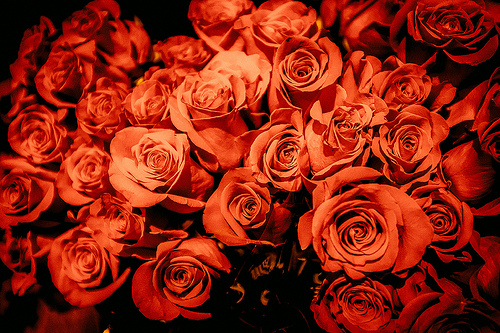

In [27]:
load_img('C:/Users/Lenovo/.keras/datasets/flower_photos/roses/10503217854_e66a804309.jpg')

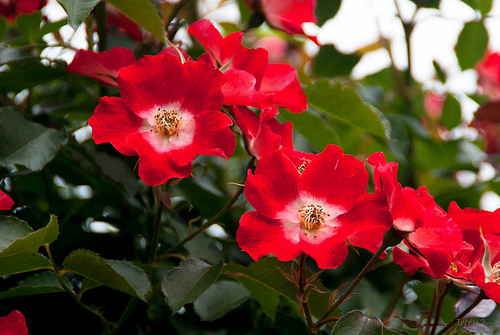

In [28]:
load_img('C:/Users/Lenovo/.keras/datasets/flower_photos/roses/12395698413_c0388278f7.jpg')

In [29]:
roses = list(data_dir.glob('roses/*.jpg'))

In [30]:
roses

[WindowsPath('C:/Users/Lenovo/.keras/datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('C:/Users/Lenovo/.keras/datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('C:/Users/Lenovo/.keras/datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('C:/Users/Lenovo/.keras/datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('C:/Users/Lenovo/.keras/datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg'),
 WindowsPath('C:/Users/Lenovo/.keras/datasets/flower_photos/roses/11102341464_508d558dfc_n.jpg'),
 WindowsPath('C:/Users/Lenovo/.keras/datasets/flower_photos/roses/11233672494_d8bf0a3dbf_n.jpg'),
 WindowsPath('C:/Users/Lenovo/.keras/datasets/flower_photos/roses/11694025703_9a906fedc1_n.jpg'),
 WindowsPath('C:/Users/Lenovo/.keras/datasets/flower_photos/roses/118974357_0faa23cce9_n.jpg'),
 WindowsPath('C:/Users/Lenovo/.keras/datasets/flower_photos/roses/11944957684_2cc806276e.jpg'),
 WindowsPath('C:/Users/Lenovo/

In [31]:
roses[5]

WindowsPath('C:/Users/Lenovo/.keras/datasets/flower_photos/roses/11102341464_508d558dfc_n.jpg')

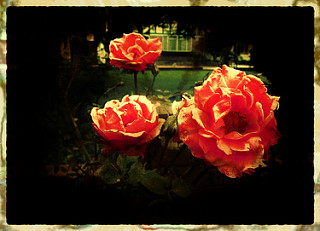

In [32]:
PIL.Image.open(roses[23])

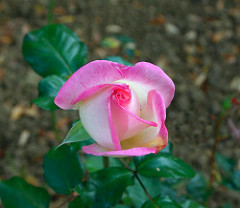

In [33]:
PIL.Image.open(roses[123])

In [34]:
batch_size = 64
epochs = 50
IMG_HIEGHT = 224
IMG_WIDHT = 224

In [35]:
image_gen_train = ImageDataGenerator(rescale=1./255,
                                    rotation_range=45,
                                    width_shift_range=.15,
                                    height_shift_range=.15,
                                    horizontal_flip=True,
                                    zoom_range=0.5,
                                    validation_split=0.2)

In [36]:
# class_mode -----> 'sparse' -- OneHotEncoder ,'categorical' -- LabelEncoder ,'binary' -- Binary

In [37]:
train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                    directory=data_dir,
                                                    shuffle=True,
                                                    target_size=(IMG_HIEGHT,IMG_HIEGHT),
                                                    subset='training',
                                                    class_mode='categorical')

Found 2939 images belonging to 5 classes.


In [38]:
3670*0.8

2936.0

In [39]:
train_data_gen.class_indices

{'daisy': 0, 'dandelion': 1, 'roses': 2, 'sunflowers': 3, 'tulips': 4}

In [40]:
image_gen_val = ImageDataGenerator(rescale=1./255,
                                  validation_split=0.2)

In [41]:
val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                directory=data_dir,
                                                target_size=(IMG_HIEGHT,IMG_WIDHT),
                                                subset='validation',
                                                class_mode='categorical')

Found 731 images belonging to 5 classes.


In [42]:
sample_image , labels = next(train_data_gen)

In [43]:
sample_image.shape

(64, 224, 224, 3)

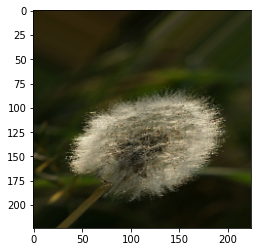

In [44]:
plt.imshow(sample_image[0])
plt.show()

In [45]:
labels

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0.

In [46]:
from keras.layers import Conv2D,MaxPooling2D,Dropout
model = Sequential([
    Conv2D(16,3,padding='same',activation='relu',input_shape=(IMG_HIEGHT,IMG_WIDHT,3)),
    MaxPooling2D(),
    #Dropout(0.2),
    Conv2D(32,3,padding='same',activation='relu'),
    MaxPooling2D(),
    #Dropout(0.2),
    Conv2D(64,3,padding='same',activation='relu'),
    MaxPooling2D(),
    #Dropout(0.2),
    Flatten(),
    Dense(512,activation='relu'),
    Dense(256,activation='relu'),
    Dense(5,activation='softmax')
])

In [47]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 50176)             0

In [48]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [49]:
filepath = 'my_best_flowers.h5'

In [50]:
from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint(filepath=filepath,
                             monitor='val_loss',
                            verbose=1,
                            save_best_only=True,
                            mode='min')

In [51]:
callbacks = [checkpoint]

In [ ]:
history = model.fit(train_data_gen,validation_data=val_data_gen,epochs=epochs,callbacks=callbacks)

Epoch 1/50
46/46 [==============================] - 75s 2s/step - loss: 1.4110 - accuracy: 0.3848 - val_loss: 1.2668 - val_accuracy: 0.4706

Epoch 00001: val_loss improved from inf to 1.26681, saving model to my_best_flowers.h5
Epoch 2/50
46/46 [==============================] - 69s 1s/step - loss: 1.1456 - accuracy: 0.5141 - val_loss: 1.1450 - val_accuracy: 0.5239

Epoch 00002: val_loss improved from 1.26681 to 1.14500, saving model to my_best_flowers.h5
Epoch 3/50
46/46 [==============================] - 68s 1s/step - loss: 1.0365 - accuracy: 0.5852 - val_loss: 1.0874 - val_accuracy: 0.5705

Epoch 00003: val_loss improved from 1.14500 to 1.08737, saving model to my_best_flowers.h5
Epoch 4/50
46/46 [==============================] - 70s 2s/step - loss: 0.9580 - accuracy: 0.6247 - val_loss: 0.9585 - val_accuracy: 0.6375

Epoch 00004: val_loss improved from 1.08737 to 0.95855, saving model to my_best_flowers.h5
Epoch 5/50
46/46 [==============================] - 69s 2s/step - loss: 0.90

46/46 [==============================] - 65s 1s/step - loss: 0.4615 - accuracy: 0.8186 - val_loss: 0.7668 - val_accuracy: 0.7647

Epoch 00041: val_loss did not improve from 0.75814
Epoch 42/50
46/46 [==============================] - 63s 1s/step - loss: 0.4433 - accuracy: 0.8306 - val_loss: 0.8127 - val_accuracy: 0.7401

Epoch 00042: val_loss did not improve from 0.75814
Epoch 43/50
46/46 [==============================] - 65s 1s/step - loss: 0.4545 - accuracy: 0.8203 - val_loss: 0.7770 - val_accuracy: 0.7442

Epoch 00043: val_loss did not improve from 0.75814
Epoch 44/50
46/46 [==============================] - 64s 1s/step - loss: 0.4386 - accuracy: 0.8289 - val_loss: 0.9194 - val_accuracy: 0.7332

Epoch 00044: val_loss did not improve from 0.75814
Epoch 45/50
46/46 [==============================] - 63s 1s/step - loss: 0.4486 - accuracy: 0.8214 - val_loss: 0.8229 - val_accuracy: 0.7237

Epoch 00045: val_loss did not improve from 0.75814
Epoch 46/50
46/46 [============================

In [59]:
model = tf.keras.models.load_model('my_best_flowers.h5')

In [60]:
img = load_img('C:/Users/Lenovo/.keras/datasets/flower_photos/roses/14172324538_2147808483_n.jpg')

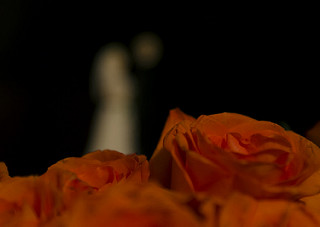

In [61]:
img

In [62]:
img_array = img_to_array(img)

In [63]:
img_array.shape

(227, 320, 3)

ValueError: cannot reshape array of size 217920 into shape (1,224,224,3)